# Time Series Analysis

## I. Data Import

In [7]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings


warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [8]:
# current working directory
cwd = os.getcwd()

# get the parent directory path
repo_dir = os.path.dirname(cwd)

In [9]:
# read dataset 'salary-explored.pkl'
df = pd.read_pickle(os.path.join(repo_dir, 'data', 'prepared-data', 'salary-explored.pkl'))

## II. Data Overview

In [10]:
# make sure pandas display all columns
pd.set_option('display.max_columns', None)

# change the display format to non-scientific notation
pd.options.display.float_format = '{:.2f}'.format

In [11]:
# check number of rows and columns
df.shape

(6860, 29)

In [12]:
# check columns
df.columns

Index(['id', 'survey_year', 'timestamp', 'salary_in_usd', 'country',
       'primary_db', 'years_of_exp_with_primary_db', 'other_dbs',
       'employment_status', 'job_title', 'manage_staff',
       'years_of_exp_with_data_jobs', 'number_of_companies_worked_for',
       'number_of_team_members', 'number_of_company_employees',
       'number_of_db_servers', 'education', 'education_is_computer_related',
       'certifications', 'hours_worked_per_week', 'wfh_days_per_week',
       'pop_of_largest_city_within_20_miles', 'employment_sector',
       'looking_for_another_job', 'career_plans_this_year', 'other_job_duties',
       'tasks_perfomed', 'month', 'salary_category'],
      dtype='object')

In [13]:
# check outputs of df
df.head(3)

,id,survey_year,timestamp,salary_in_usd,country,primary_db,years_of_exp_with_primary_db,other_dbs,employment_status,job_title,manage_staff,years_of_exp_with_data_jobs,number_of_companies_worked_for,number_of_team_members,number_of_company_employees,number_of_db_servers,education,education_is_computer_related,certifications,hours_worked_per_week,wfh_days_per_week,pop_of_largest_city_within_20_miles,employment_sector,looking_for_another_job,career_plans_this_year,other_job_duties,tasks_perfomed,month,salary_category
0,0,2017,2017-01-05 05:10:20,200000.00,United States,Microsoft SQL Server,10,MySQL/MariaDB,Full time employee,DBA,No,5,Not Asked,2,Not Asked,350,Masters,No,"Yes, and they're currently valid",45,1,Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,1,150K-200K
1,1,2017,2017-01-05 05:26:23,61515.00,United Kingdom,Microsoft SQL Server,15,"Oracle, PostgreSQL",Full time employee,DBA,No,3,Not Asked,1,Not Asked,40,None (no degree completed),Not Provided,"No, I never have",35,2,Not Asked,Private business,No,Not Asked,Not Asked,Not Asked,1,50K-100K
2,2,2017,2017-01-05 05:32:57,95000.00,Germany,Microsoft SQL Server,5,"Oracle, MySQL/MariaDB, Informix",Full time employee,Other,Yes,25,Not Asked,2,Not Asked,100,Masters,Yes,"Yes, but they expired",45,"None, or less than 1 day per week",Not Asked,Private business,"Yes, but only passively (just curious)",Not Asked,Not Asked,Not Asked,1,50K-100K


In [14]:
# check column survey_year
df['survey_year'].value_counts()

2018    3088
2017    2893
2019     879
Name: survey_year, dtype: int64

In [15]:
# check column timestamp
df['timestamp'].value_counts()

2017-01-05 11:13:26    3
2017-01-05 12:03:55    3
2017-01-05 11:48:25    2
2017-01-09 08:30:55    2
2018-12-21 16:49:48    2
                      ..
2017-01-09 12:48:09    1
2017-01-09 12:47:14    1
2017-01-09 12:46:06    1
2017-01-09 12:44:25    1
2019-01-05 18:25:22    1
Name: timestamp, Length: 6781, dtype: int64

In [16]:
# check column month as it is a derived column from timestamps
df['month'].value_counts()

12    3650
1     3210
Name: month, dtype: int64

**Observation:**

There are time variables in the data, however, the dataset is not sufficient to qualify as a time series data because it has only a few time points.

In [21]:
# check column country
df['country'].value_counts()

United States     4498
United Kingdom     667
Canada             241
Australia          182
India              109
                  ... 
Bermuda              1
Venezuela            1
Paraguay             1
Bolivia              1
Taiwan               1
Name: country, Length: 83, dtype: int64

In [19]:
us_count = df['country'].value_counts()['United States']
total_count = df['country'].count()
us_percent = (us_count / total_count) * 100

In [20]:
us_percent

65.56851311953352

## III. API Configuration & Data Subsetting and Wrangling

### III.1. API configuration

In [12]:
# configure API key
quandl.ApiConfig.api_key = 'KLBzymmzykQms3wBGr2N'

**Observation:**

I have chosen the GDP of the United States as the main indicator to complement the analysis. The reason is the majority of respondents for the survey are from the US, and time series analysis on US GDP can provide insights into the economic conditions where these data professionals are working.

In [22]:
# load the data
data = quandl.get("FRED/GDP")

In [23]:
data

,Value
Date,
1947-01-01,243.16
1947-04-01,245.97
1947-07-01,249.59
1947-10-01,259.75
1948-01-01,265.74
...,...
2020-10-01,21477.60
2021-01-01,22038.23
2021-04-01,22740.96


In [24]:
data.shape

(300, 1)

In [25]:
data.columns

Index(['Value'], dtype='object')

In [26]:
type(data)

pandas.core.frame.DataFrame

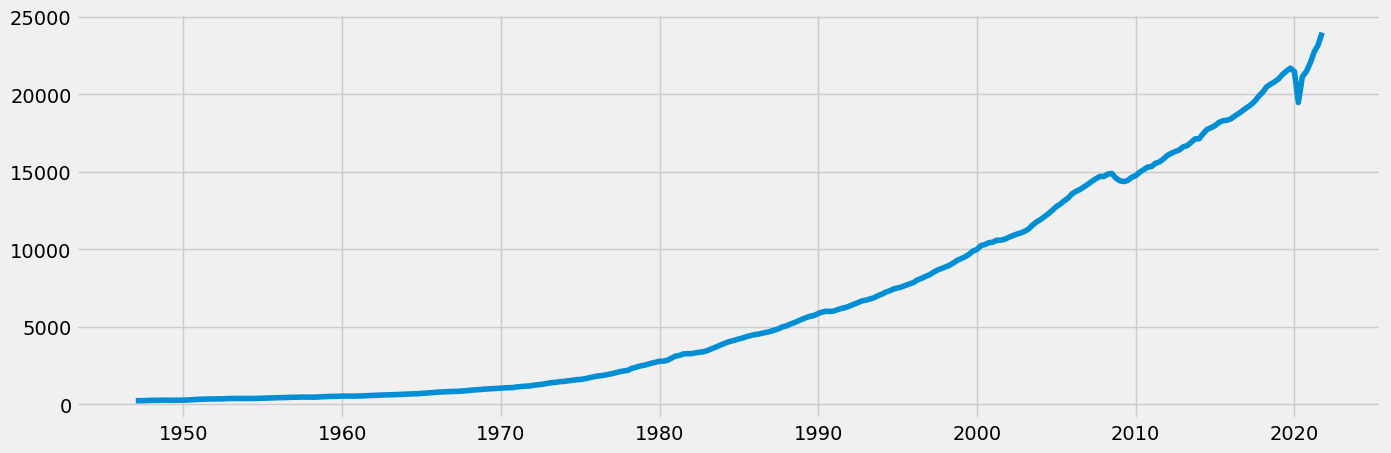

In [27]:
# plot the data using matplotlib
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

### III.2. Data subsetting

In [28]:
# reset index to use the 'Date' column as a filter
data_2 = data.reset_index()

In [29]:
data_2.head()

,Date,Value
0,1947-01-01,243.16
1,1947-04-01,245.97
2,1947-07-01,249.59
3,1947-10-01,259.75
4,1948-01-01,265.74


In [30]:
data_2.tail()

,Date,Value
295,2020-10-01,21477.60
296,2021-01-01,22038.23
297,2021-04-01,22740.96
298,2021-07-01,23202.34
299,2021-10-01,23992.35


To complement the analysis on the salary of data professionals worldwide from 2017 to 2019, it is ideal to have time series data on GDP of the US that goes back at least 5 years.

At the same time, the last timestamp in the main data set is on 05 January 2019, and everything after is a prediction, therefore, data from 6 January 2019 onwards is also excluded.

In [31]:
data_sub = data_2.loc[(data_2['Date'] >= '2010-01-01') & (data_2['Date'] < '2019-01-06')]

In [32]:
data_sub.shape

(37, 2)

In [33]:
data_sub.head()

,Date,Value
252,2010-01-01,14764.61
253,2010-04-01,14980.19
254,2010-07-01,15141.60
255,2010-10-01,15309.47
256,2011-01-01,15351.44


In [34]:
# set the 'Date column as the index
from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # create a datetime column from 'Date'
data_sub = data_sub.set_index('datetime') # set the datetime as the index of the dataframe
data_sub.drop(['Date'], axis=1, inplace=True) # drop the 'Date' column'
data_sub.head()

,Value
datetime,
2010-01-01,14764.61
2010-04-01,14980.19
2010-07-01,15141.60
2010-10-01,15309.47
2011-01-01,15351.44


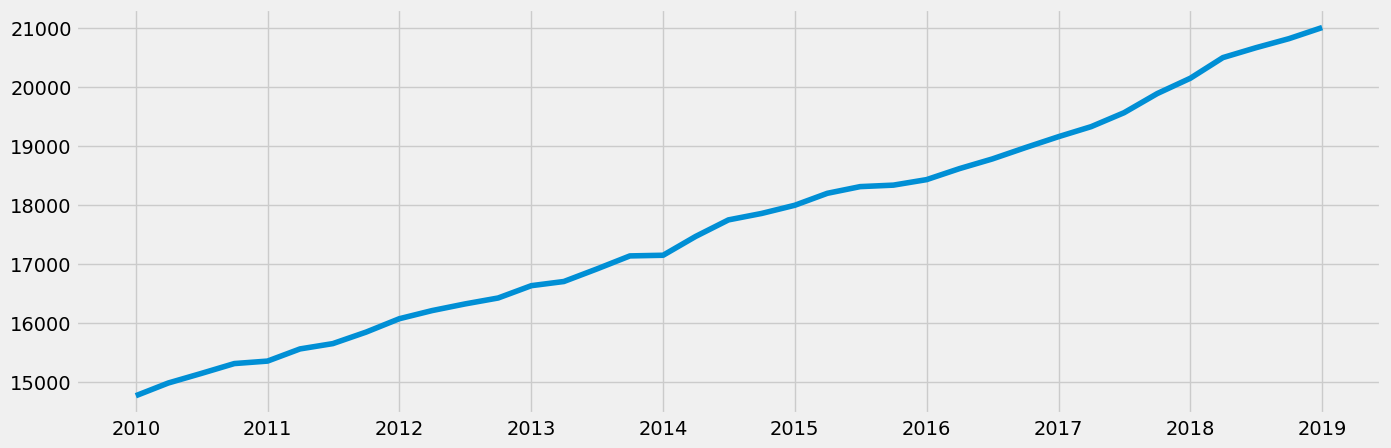

In [35]:
# plot the new data set
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

### III.3. Data wrangling

In [36]:
# check for missing values
data_sub.isnull().sum() 

Value    0
dtype: int64

In [37]:
# check for duplicates
dups = data_sub.duplicated()
dups.sum()

0

In [38]:
data_sub

,Value
datetime,
2010-01-01,14764.61
2010-04-01,14980.19
2010-07-01,15141.60
2010-10-01,15309.47
2011-01-01,15351.44
2011-04-01,15557.53
2011-07-01,15647.68
2011-10-01,15842.27
2012-01-01,16068.82


## IV. Time-Series Analysis: Decomposition

In the case of US GDP, it appears that the magnitude of the seasonal fluctuations is increasing over time, and the trend is not perfectly linear. Therefore, it may be more appropriate to use a multiplicative model to decompose this time series data on US GDP.

In [40]:
# decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(data_sub, model='multiplicative')

In [41]:
from pylab import rcParams # this will define a fixed size for all special charts
rcParams['figure.figsize'] = 18, 7

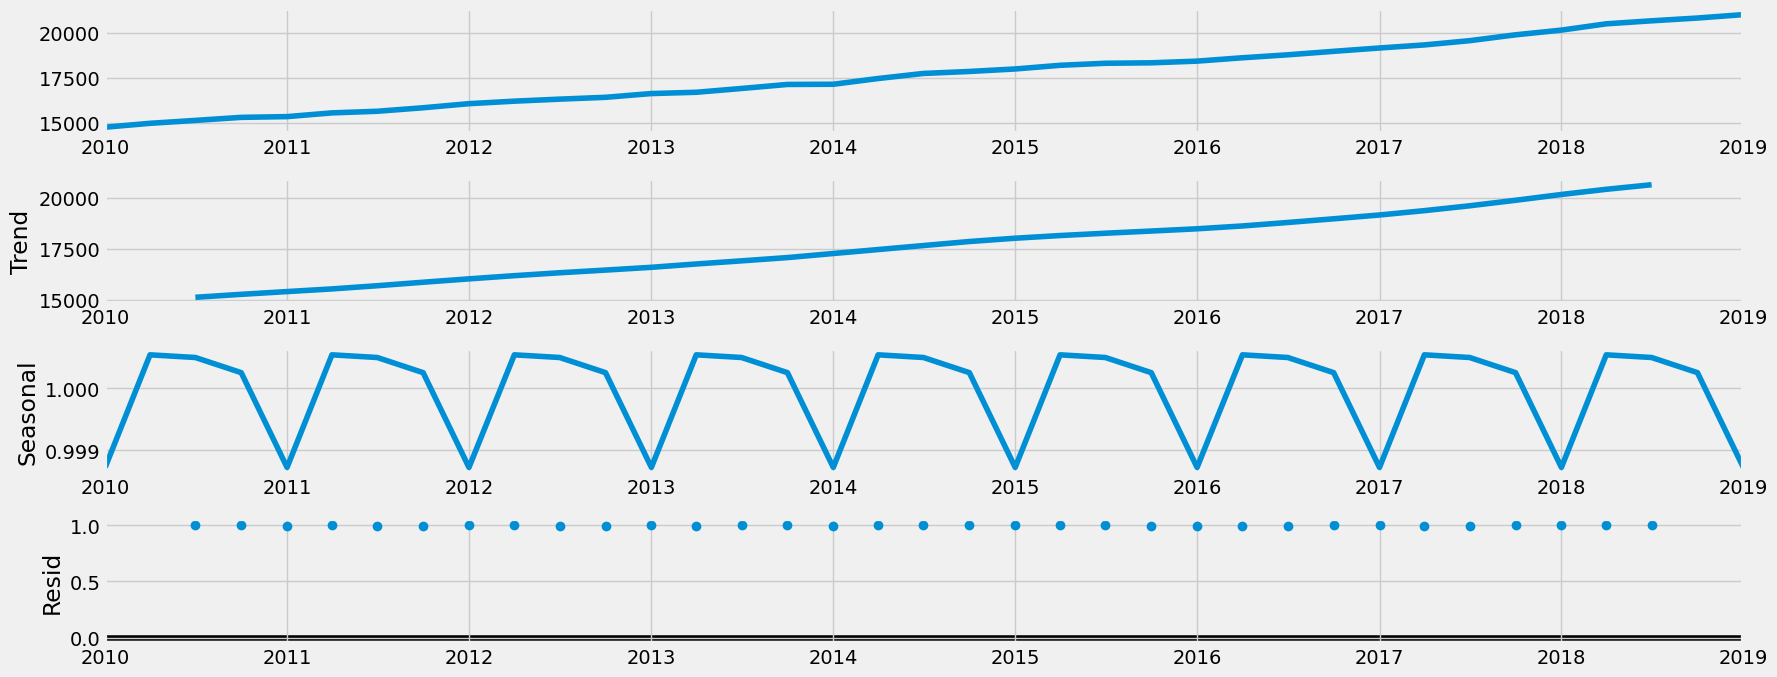

In [42]:
# plot the separate components
decomposition.plot()
plt.show()

**Observation:** The time series data shows an increasing trend in the GDP of the US from 2010 to 2019, with some fluctuations.

There is also a clear seasonal pattern, with higher GDP values in the second and fourth quarters of each year compared to the first and third quarters.

The noise or random variation in the data appears to be relatively small, as the data points are mostly close to the trend line, and the seasonal pattern is consistent across the years.

### IV.1. Test for stationarity

In [43]:
# the adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers; this is why you need to also define a function that prints the correct output from that array

from statsmodels.tsa.stattools import adfuller # import the adfuller() function

# define the function
def dickey_fuller(timeseries): 
    # perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                 1.55
p-value                        1.00
Number of Lags Used            0.00
Number of Observations Used   36.00
Critical Value (1%)           -3.63
Critical Value (5%)           -2.95
Critical Value (10%)          -2.61
dtype: float64


**Observation:**

Based on the Dickey-Fuller Stationarity test results, the p-value is greater than 0.05, which indicates that we cannot reject the null hypothesis that the data is non-stationary.

At the same time, the test statistic is greater than the critical values at all levels of significance. This further suggests that we cannot reject the null hypothesis of non-stationarity.

Therefore, the data is likely non-stationary.

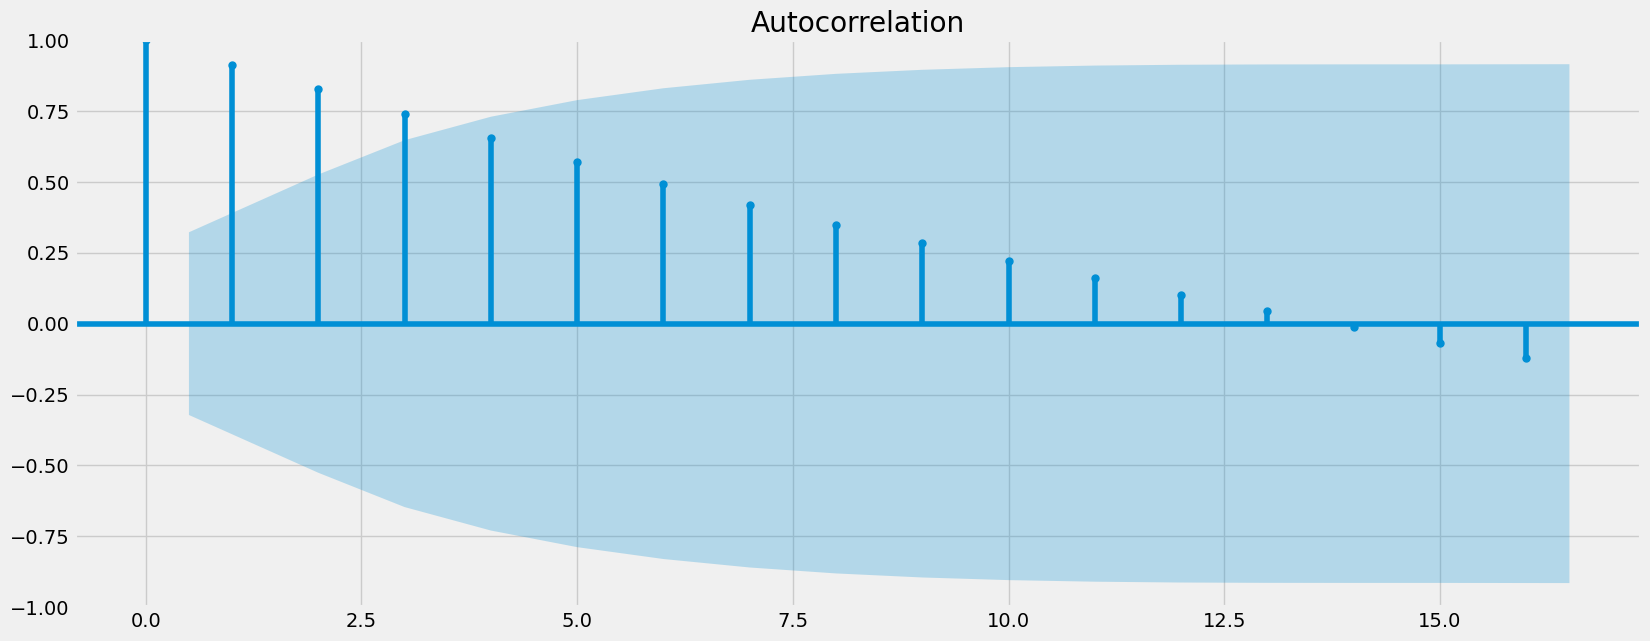

In [44]:
# check out a plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

**Observation:**

Based on the autocorrelation plot, there are lags that are significantly correlated with each other. This is a sign of non-stationarity in the data.

### IV.2. Stationarizing the data

In [45]:
data_diff = data_sub - data_sub.shift(1) # the df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [46]:
# remove the missing values that came about as a result of the differencing
data_diff.dropna(inplace = True)

# need to remove these or you won't be able to run the Dickey-Fuller test

In [47]:
data_diff.head()

,Value
datetime,
2010-04-01,215.58
2010-07-01,161.41
2010-10-01,167.87
2011-01-01,41.97
2011-04-01,206.09


In [48]:
data_diff.columns

Index(['Value'], dtype='object')

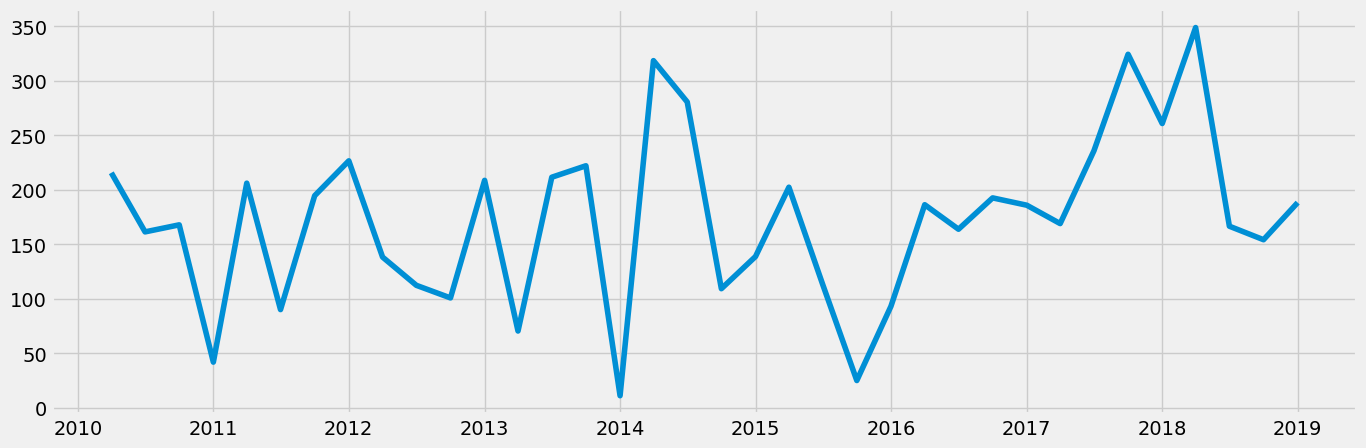

In [49]:
# check out what the differencing did to the time-series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [50]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -5.22
p-value                        0.00
Number of Lags Used            0.00
Number of Observations Used   35.00
Critical Value (1%)           -3.63
Critical Value (5%)           -2.95
Critical Value (10%)          -2.61
dtype: float64


**Observation:**

The stationarity test result after stationarizing the data indicates that the data is now stationary.

The test statistic value of -5.22 is less than the critical values at the 1%, 5%, and 10% significance levels, and the p-value is less than 0.05. This means that we can reject the null hypothesis that the data is non-stationary and conclude that the data is stationary.

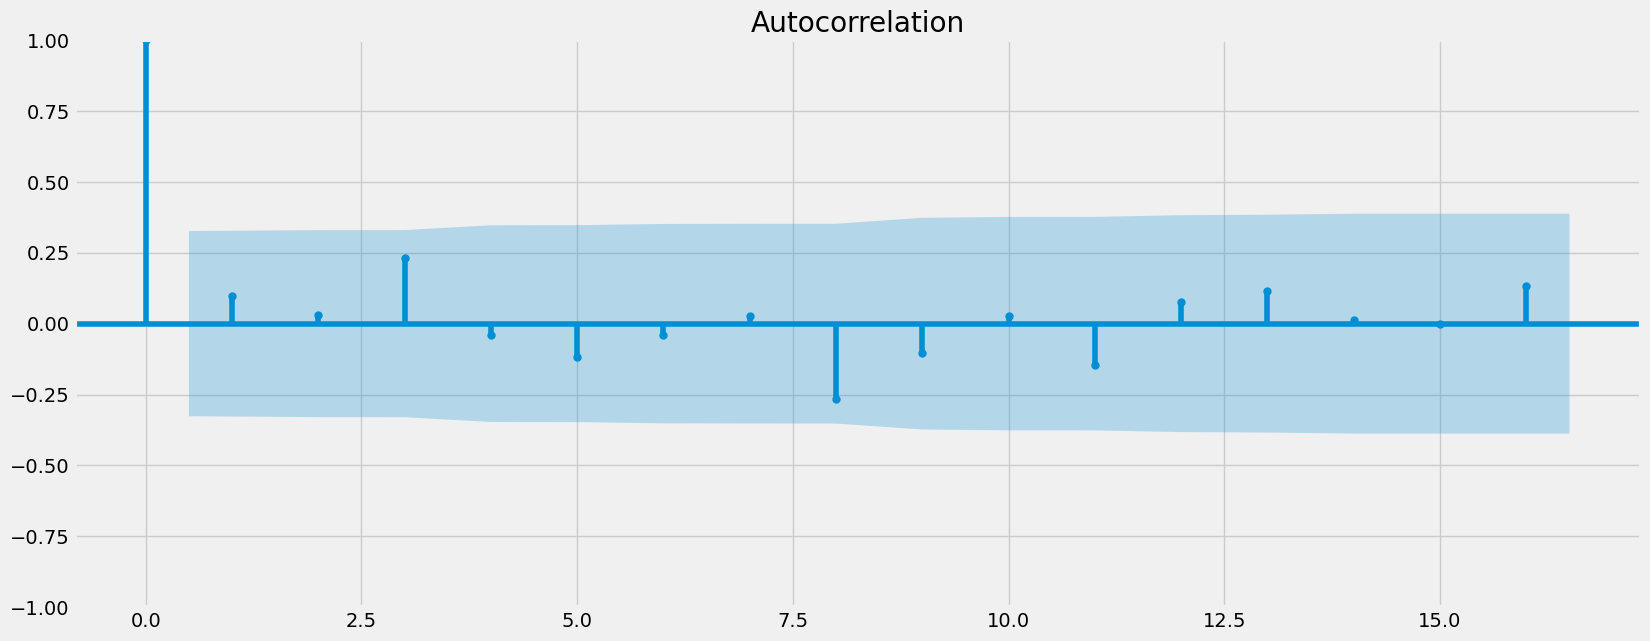

In [51]:
plot_acf(data_diff)
plt.show()

**Observation:**

The autocorrelation plot shows data being stationary except for a spike at lag one. This means that there is still some correlation between the observations at time zero and time one, which can be due to seasonality or other effects. However, as long as the autocorrelation values for other lags are within the confidence interval, the data can be considered stationary.